## Summary

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,505,1324141560770908160,#30DayMapChallenge Day 5 | Blue\n\nWhen ideas ...,en,2020-11-05 00:08:44,2,9,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2614024302,Rob Radburn,robradburn,"Leicester, UK",3181,749,http://pbs.twimg.com/media/EmBLumxWkAMR4Ij.jpg,https://t.co/vww6deAh31
1816,506,1324141334383439873,Day 4 of #30DayMapChallenge \n - Hexagones\nWo...,en,2020-11-05 00:07:50,1,4,"[{'text': '30DayMapChallenge', 'indices': [9, ...",2593554955,Kapazitätsdiode,varaktor,NaN,24,182,http://pbs.twimg.com/media/EmBLJyiWoAMwkJP.jpg,https://t.co/DxQ6BCVi4w
1817,507,1324141226837377024,"#30DayMapChallenge 5. Blue.\n\nBlue elevation,...",no,2020-11-05 00:07:24,1,9,"[{'text': '30DayMapChallenge', 'indices': [0, ...",44981447,Tore Halset,torehalset,"Stavanger, Norway",285,735,http://pbs.twimg.com/media/EmBLJljXYAURsus.jpg,https://t.co/SyEBAq59nw
1818,508,1324140549817905154,"I first studied the ""Ring of Fire"" in an intro...",en,2020-11-05 00:04:43,1,5,"[{'text': '30DayMapChallenge', 'indices': [124...",133541065,Eric Goodwin,mr_ericgoodwin,"Center of Tennessee, Tennessee",381,586,http://pbs.twimg.com/media/EmBJqfJWoAEdX6G.jpg,https://t.co/v6v7FKPAoi


In [7]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [8]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,505,1324141560770908160,#30DayMapChallenge Day 5 | Blue\n\nWhen ideas ...,en,2020-11-05 00:08:44,2,9,"[{'text': '30DayMapChallenge', 'indices': [0, ...",2614024302,Rob Radburn,robradburn,"Leicester, UK",3181,749,http://pbs.twimg.com/media/EmBLumxWkAMR4Ij.jpg,https://t.co/vww6deAh31,2020-11-05
1816,506,1324141334383439873,Day 4 of #30DayMapChallenge \n - Hexagones\nWo...,en,2020-11-05 00:07:50,1,4,"[{'text': '30DayMapChallenge', 'indices': [9, ...",2593554955,Kapazitätsdiode,varaktor,NaN,24,182,http://pbs.twimg.com/media/EmBLJyiWoAMwkJP.jpg,https://t.co/DxQ6BCVi4w,2020-11-05
1817,507,1324141226837377024,"#30DayMapChallenge 5. Blue.\n\nBlue elevation,...",no,2020-11-05 00:07:24,1,9,"[{'text': '30DayMapChallenge', 'indices': [0, ...",44981447,Tore Halset,torehalset,"Stavanger, Norway",285,735,http://pbs.twimg.com/media/EmBLJljXYAURsus.jpg,https://t.co/SyEBAq59nw,2020-11-05
1818,508,1324140549817905154,"I first studied the ""Ring of Fire"" in an intro...",en,2020-11-05 00:04:43,1,5,"[{'text': '30DayMapChallenge', 'indices': [124...",133541065,Eric Goodwin,mr_ericgoodwin,"Center of Tennessee, Tennessee",381,586,http://pbs.twimg.com/media/EmBJqfJWoAEdX6G.jpg,https://t.co/v6v7FKPAoi,2020-11-05


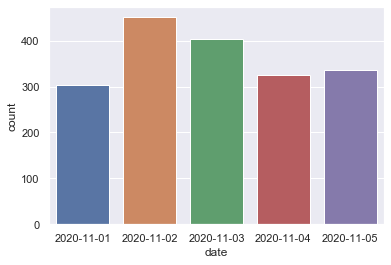

In [9]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)

plt.savefig("./graphs/maps_count.png")